### 파이썬 기초

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

In [2]:
# 나눔 고딕 폰트의 경로 명시
path = 'C:/Windows/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

font_name

'NanumGothic'

In [3]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [4]:
# 파이토치 관련 라이브러리
import torch

#### 컨테이너 타입 변수
- 파이썬의 변수는 실제 데이터 구조를 바라보는 포인터임. 넘파이 배열에서 예상외의 결과를 초래할 수 있음

In [7]:
## 넘파이 배열 정의
x = np.array([1,3,5])

y = x

In [6]:
x, y

(array([1, 3, 5]), array([1, 3, 5]))

In [9]:
## x의 요소를 변경
x[1] = -3

x, y  ## 주의 할 것!

(array([ 1, -3,  5]), array([ 1, -3,  5]))

- 따로 변해야 하는 경우, 깊은 복사 copy() 를 사용해야 함

In [10]:
x= np.array([1,3,5,7,9])
y = x.copy()

x, y

(array([1, 3, 5, 7, 9]), array([1, 3, 5, 7, 9]))

In [11]:
x[1] = -3

x, y

(array([ 1, -3,  5,  7,  9]), array([1, 3, 5, 7, 9]))

#### 텐서, 넘파이

- 거의 유사한 기능을 담고 있음

In [12]:
t1 = torch.ones(5)

t1

tensor([1., 1., 1., 1., 1.])

In [13]:
n1 = t1.data.numpy()

t1, n1

(tensor([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.], dtype=float32))

In [14]:
t1[1] = -3

t1, n1

(tensor([ 1., -3.,  1.,  1.,  1.]),
 array([ 1., -3.,  1.,  1.,  1.], dtype=float32))

- 넘파이와 텐서간에도 copy()를 사용

In [15]:
t1 = torch.ones(5)

n1 = t1.data.numpy().copy()

t1, n1

(tensor([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.], dtype=float32))

In [16]:
t1[1] = -3

t1, n1

(tensor([ 1., -3.,  1.,  1.,  1.]), array([1., 1., 1., 1., 1.], dtype=float32))

#### 합성함수 파이썬

- 아래의 식을 함수로 정의
$$ f(x) = 2 * x^2 + 4 $$  

In [17]:
def f(x):
    return (2 * x**2 + 4)

In [21]:
## 넘파이 배열로 x를 정의한다
x = np.arange(-2, 2.25, 0.25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [22]:
## f(x) 실행결과를 y에 대입
y = f(x)
y

array([12.   , 10.125,  8.5  ,  7.125,  6.   ,  5.125,  4.5  ,  4.125,
        4.   ,  4.125,  4.5  ,  5.125,  6.   ,  7.125,  8.5  , 10.125,
       12.   ])

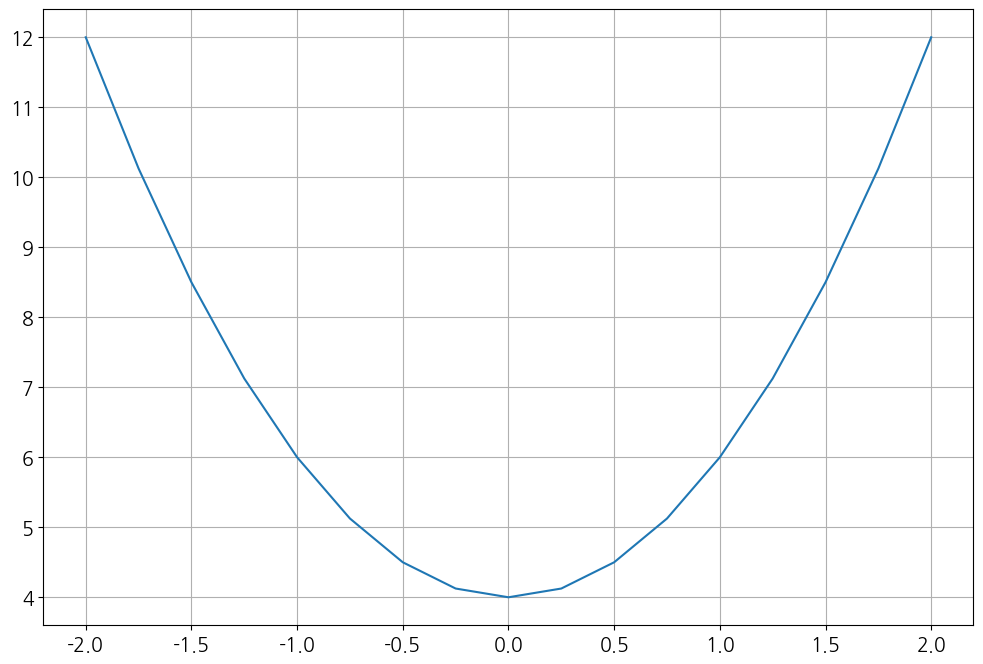

In [25]:
## 함수 그래프화
plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.grid(True)
plt.show()

In [26]:
## 세 가지 기본 함수의 정의
def f1(x):
    return(x**2)

def f2(x):
    return(x*2)

def f3(x):
    return(x+2)

# 합성 함수 만들기

x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

In [27]:
## 합성함수 값 확인
x1, x2, y

(array([4.    , 3.0625, 2.25  , 1.5625, 1.    , 0.5625, 0.25  , 0.0625,
        0.    , 0.0625, 0.25  , 0.5625, 1.    , 1.5625, 2.25  , 3.0625,
        4.    ]),
 array([8.   , 6.125, 4.5  , 3.125, 2.   , 1.125, 0.5  , 0.125, 0.   ,
        0.125, 0.5  , 1.125, 2.   , 3.125, 4.5  , 6.125, 8.   ]),
 array([10.   ,  8.125,  6.5  ,  5.125,  4.   ,  3.125,  2.5  ,  2.125,
         2.   ,  2.125,  2.5  ,  3.125,  4.   ,  5.125,  6.5  ,  8.125,
        10.   ]))

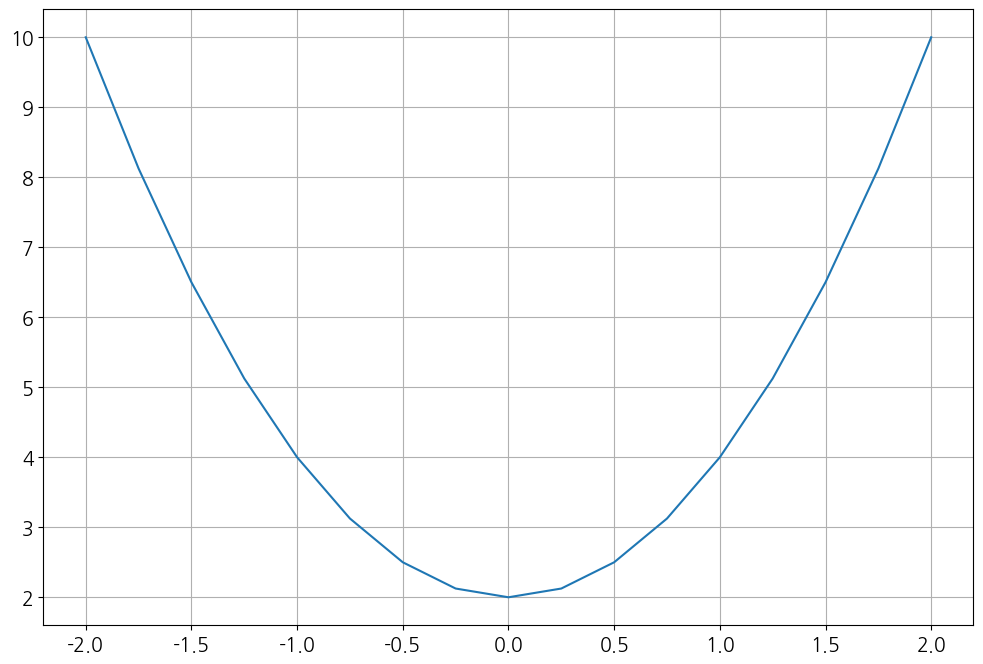

In [32]:
## 그래프그리기
plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.grid(True)
plt.show()

#### 미분과 파이썬 수치 미분 구현
- 파이썬의 함수 또는 변수명은 단지 포인터이며, 실체는 별개로 존재함. 이 점을 이용하면, '함수를 인수로하는 함수'를 생성 가능
- 함수를 수치 미분하는 함수 diff를 정의. 수치 미분의 계산에는, 미분의 정의로부터 아래의 근사식을 사용

$$ f'(x) = \frac { f(x+h ) - f(x-h) } { 2h } $$

In [33]:
## 함수를 미분하는 함수 fdiff 정의
def fdiff(f):
    ## 함수 f를 인수로 미분한 결과 함수를 diff로 정의
    def diff(x):
        h = 1e-6
        return (f(x+h) - f(x-h)) / (2*h)

    # 미분결과 함수 diff 리턴
    return diff

In [34]:
# 2차 함수의 수치 미분

# f의 미분 결과 함수 diff를 취득
diff = fdiff(f)

# 미분 결과를 계산하고 y_dash에 대입
y_dash = diff(x)

# 결과 확인
print(y_dash)

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


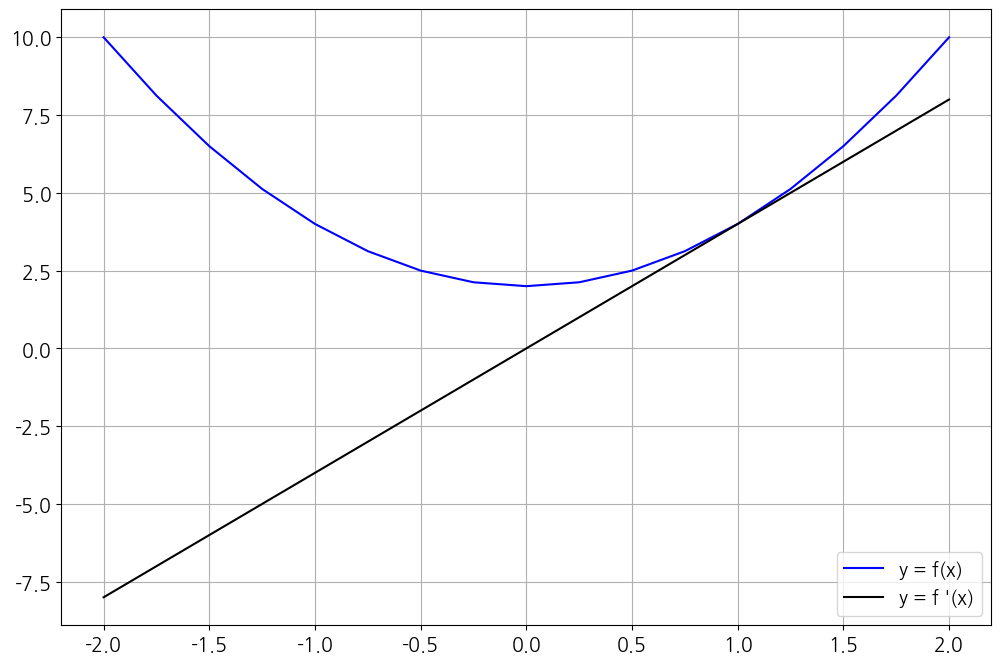

In [35]:
## 결과 그래프 출력
plt.figure(figsize=(12,8))
plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.grid(True)
plt.legend()
plt.show()

- 시그모이드 함수 식
$$ g(x) = \frac {1} {1+ exp(-x)} $$

In [36]:
## 시그모이드 함수의 정의
def g(x):
    return 1 / (1 + np.exp(-x))

In [37]:
## 시그모이드 함수 계산
y = g(x)
y

array([0.1192, 0.148 , 0.1824, 0.2227, 0.2689, 0.3208, 0.3775, 0.4378,
       0.5   , 0.5622, 0.6225, 0.6792, 0.7311, 0.7773, 0.8176, 0.852 ,
       0.8808])

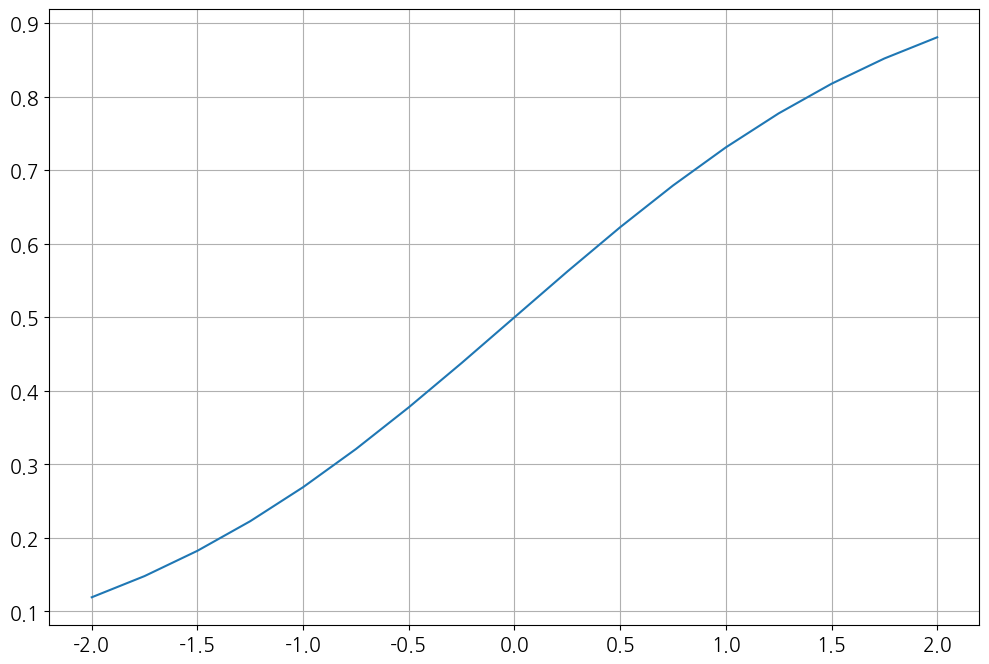

In [40]:
## 그래프 출력
plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.grid(True)
plt.show()

In [39]:
## 시그모이드 함수의 수치 미분
# g를 미분한 함수 취득
diff = fdiff(g)
# diff를 사용해 미분 결과 y_dash를 계산
y_dash = diff(x)
y_dash

array([0.105 , 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.235 , 0.2461,
       0.25  , 0.2461, 0.235 , 0.2179, 0.1966, 0.1731, 0.1491, 0.1261,
       0.105 ])

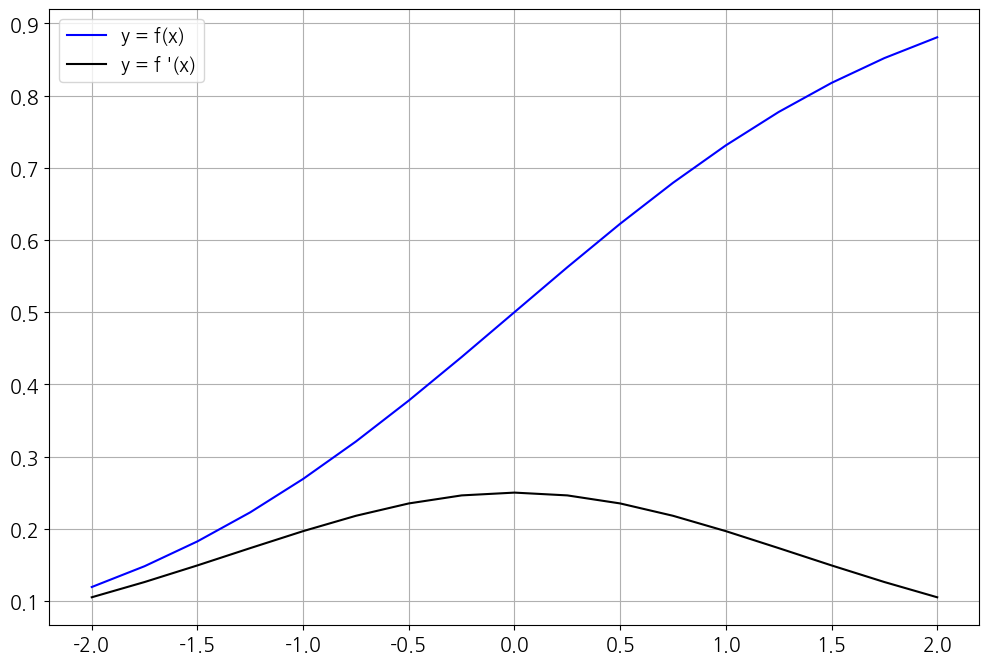

In [41]:
# 결과 그래프 출력
plt.figure(figsize=(12,8))
plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.grid(True)
plt.legend()
plt.show()

- 시그모이드 함수 미분 결과는 $y(1-y)$
- y에 대해 2차로, $y=\frac{1}{2}$일 때 최대값 $\frac{1}{4}$를 가짐. 그래프와 결과는 일치, 수치미분이 올바르게 이루어짐을 확인

#### 커스텀 클래스 정의

In [42]:
# 그래프 출력을 위한 라이브러리
import matplotlib.pyplot as plt

# 원을 그리기 위해 필요한 라이브러리
import matplotlib.patches as patches

In [43]:
## Point 클래스 정의
class Point:
    # 인스턴스 생성 시에 두 개의 인수 x와 y를 가짐
    def __init__(self, x, y):
        # 인스턴스 속성 x에 첫 번째 인수를 할당
        self.x = x
        # 인스턴스 속성 y에 두 번째 인수를 할당
        self.y = y

    # draw 함수 정의(인수 없음)
    def draw(self):
        # (x, y)에 점을 그림
        plt.plot(self.x, self.y, marker='o', markersize=10, c='k')

In [45]:
# Point 클래스로 인스턴스 변수 p1과 p2 생성
p1 = Point(2,3)
p2 = Point(-1, -2)

In [46]:
# p1과 p2의 속성x, y
print(p1.x, p1.y)
print(p2.x, p2.y)

2 3
-1 -2


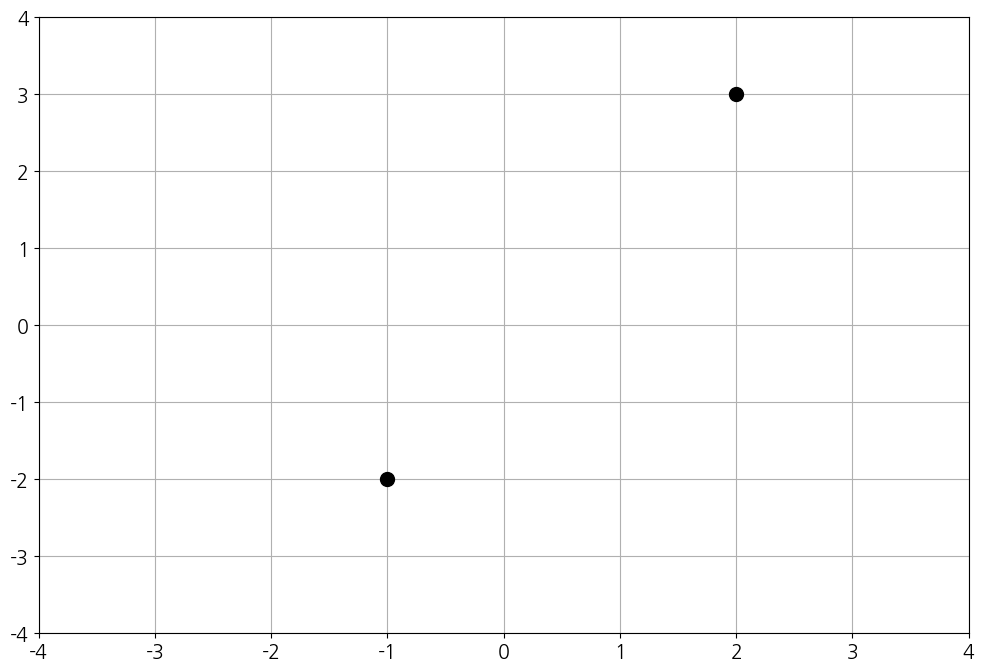

In [48]:
# p1과 p2의 draw 함수를 호출하고, 두 개의 점을 출력함
plt.figure(figsize=(12,8))
p1.draw()
p2.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

In [50]:
# Point의 자식 클래스 Circle 정의 1
class Circle1(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # 이 단계에서 draw 함수는 정의하지 않음

In [51]:
# Circle1 클래스에서 인스턴스 변수 c1_1을 생성
c1_1 = Circle1(1, 0, 2)

In [52]:
## c1_1의 속성 확인
c1_1.x, c1_1.y, c1_1.r

(1, 0, 2)

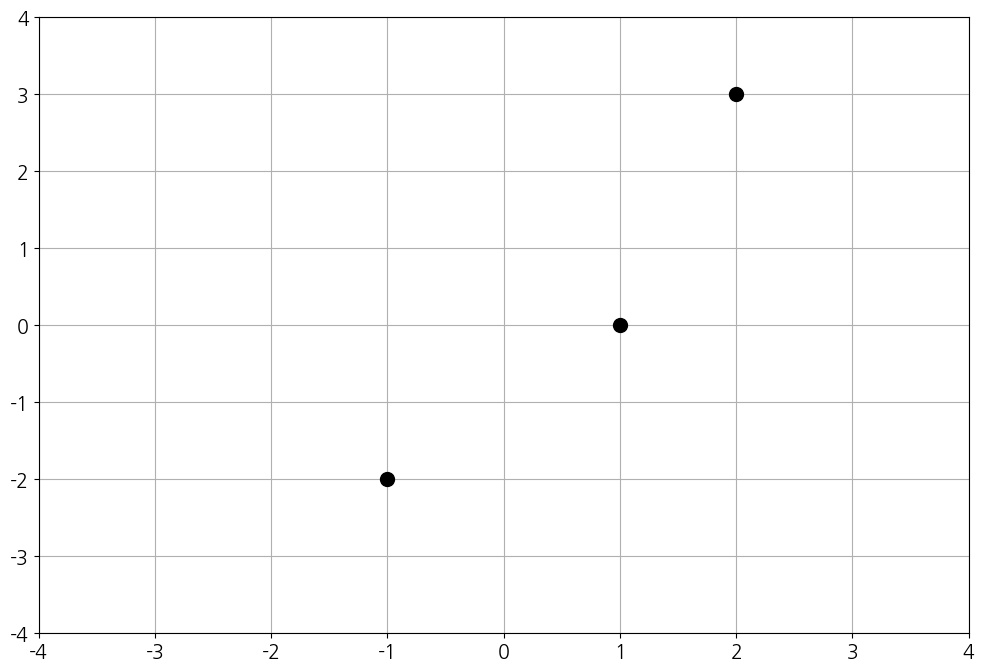

In [53]:
# p1, p2, c1_1의 각 draw 함수를 호출
plt.figure(figsize=(12,8))
ax = plt.subplot()
p1.draw()
p2.draw()
c1_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

- 이 단계에서 draw 함수는 부모쪽에서 정의한 함수가 호출되고 있음

In [58]:
# Point의 자식 클래스 Circle의 정의 2

class Circle2(Point):
    # Circle은 인스턴스 생성 시에 인수x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # draw 함수는 자식 클래스만 따로 원을 그림
    def draw(self):
        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [59]:
# Circle2 클래스로부터 인스턴스 변수 c2_1을 생성
c2_1 = Circle2(1, 0, 2)

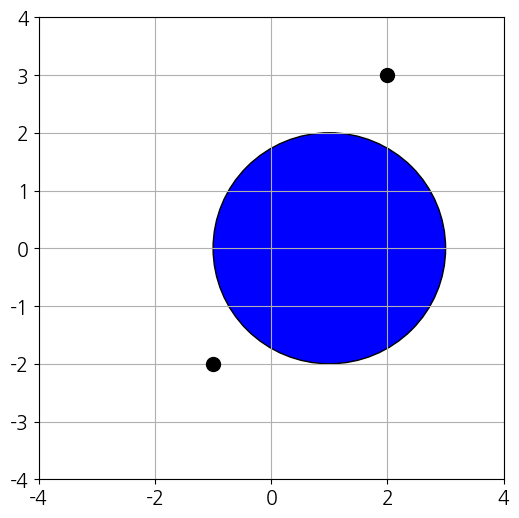

In [67]:
# p1, p2, c2_1의 각 draw 함수를 호출
# plt.figure(figsize=(12,8))
ax = plt.subplot()
p1.draw()
p2.draw()
c2_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

In [64]:
# Point의 자식 클래스 Circle의 정의 3

class Circle3(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # Circle의 draw 함수는 부모의 함수를 호출한 다음, 원 그리기를 독자적으로 수행함
    def draw(self):
        # 부모 클래스의 draw 함수 호출
        super().draw()
        
        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [65]:
# Circle3 클래스로부터 인스턴스 변수 c3_1를 생성
c3_1 = Circle3(1, 0, 2)

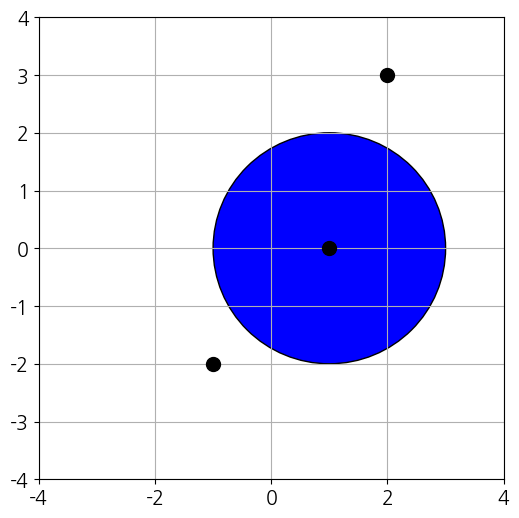

In [66]:
# p1, p2, c3_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c3_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

#### 인스턴스를 함수로 사용

In [54]:
## 함수 클래스 H의 정의
class H:
    def __call__(self, x):
        return 2*x**2 + 2

In [56]:
## h가 함수로 동작하는지 확인

# 넘파이 배열 x를 정의
x = np.arange(-2, 2.1, 0.25)

# H 클래스의 인스턴스로 h를 생성
h = H() 

# 함수 h 호출
y = h(x)

x, y

(array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
         0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ]),
 array([10.   ,  8.125,  6.5  ,  5.125,  4.   ,  3.125,  2.5  ,  2.125,
         2.   ,  2.125,  2.5  ,  3.125,  4.   ,  5.125,  6.5  ,  8.125,
        10.   ]))

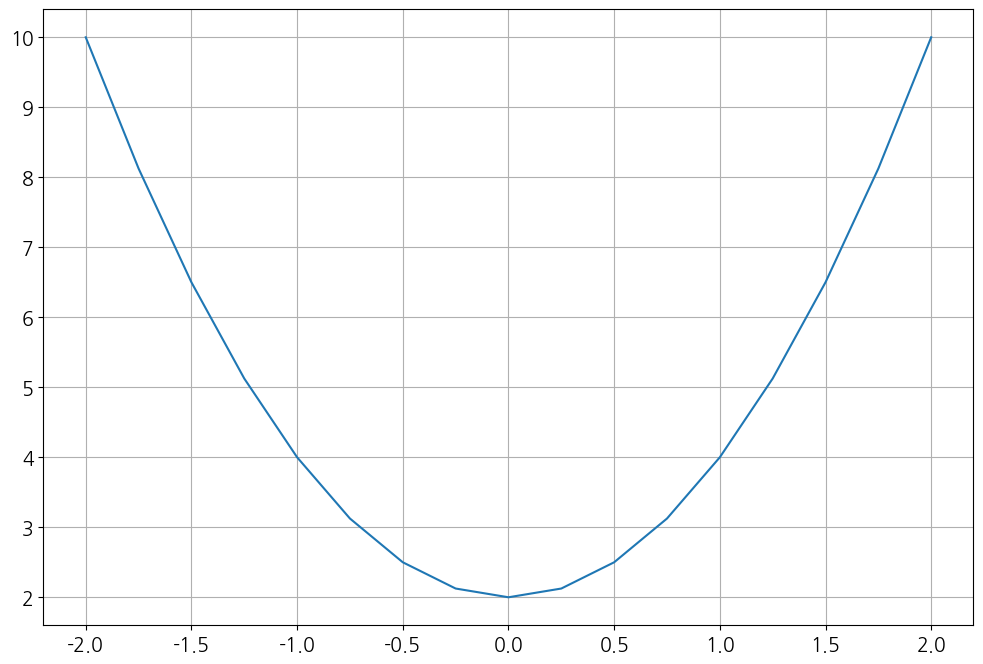

In [57]:
## 그래프 출력
plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.show()